# 03 Probability and Distributions

## 01 Basic Concepts

### 1. Random Sampling(임의 추출)

In [6]:
# sampling without replacement
sample(1:40, 5)

[1] 26 19 16 37 12

In [11]:
# sampling with replacement
sample(c('H','T'), 10, replace=T)

[1] "T" "H" "T" "H" "T" "H" "T" "H" "H" "H"

In [14]:
# sampling with prob(*)
sample(c('succ', 'fail'), 10, replace=T, prob=c(0.9, 0.1))

[1] "succ" "succ" "succ" "succ" "fail" "fail" "succ" "succ" "succ" "succ"

### 2. Prob. Calculations and Combinatorics

순열(Permutation) 및 조합(Combination)

<img src="https://latex.codecogs.com/svg.image?_nC_r=\frac{_nP_r}{r!}=\frac{n!}{r!(n-r)!}\;\;\;\begin{pmatrix}n\\r\end{pmatrix}"> 로도 표현

In [1]:
# The probability to choose 5 numbers out of 40
prod(5:1)/prod(40:36)

[1] 1.519738e-06

In [2]:
1/choose(40,5)

[1] 1.519738e-06

### 3. Discrete distributions(이산형 분포)

binomial distributions(이항분포)

*X ~ b(n,p)*

<img src="https://latex.codecogs.com/svg.image?&space;f(x)=\binom{n}{x}p^x(1-p)^{n-x}">

### 4. Continuous Distributions(연속형 분포)

Normal distributions(정규 분포)

<img src="https://latex.codecogs.com/svg.image?X\sim&space;N(\mu,\sigma^2)"> <br>

<img src="https://latex.codecogs.com/svg.image?f(x)=\frac{1}{\sqrt{2\pi\sigma}}\cdot&space;exp(-\frac{(x-\mu)^2}{2\sigma^2})">


### 5. The built-in distributions in R

- Density or point probability
- Comulated probability, distibution function
- Quantiles
- Pseudo-random numbers

※ For the normal distribution, these are named dnorm, pnorm, qnorm, and rnorm(density, probability, quantile, and random respectively)

#### Densities

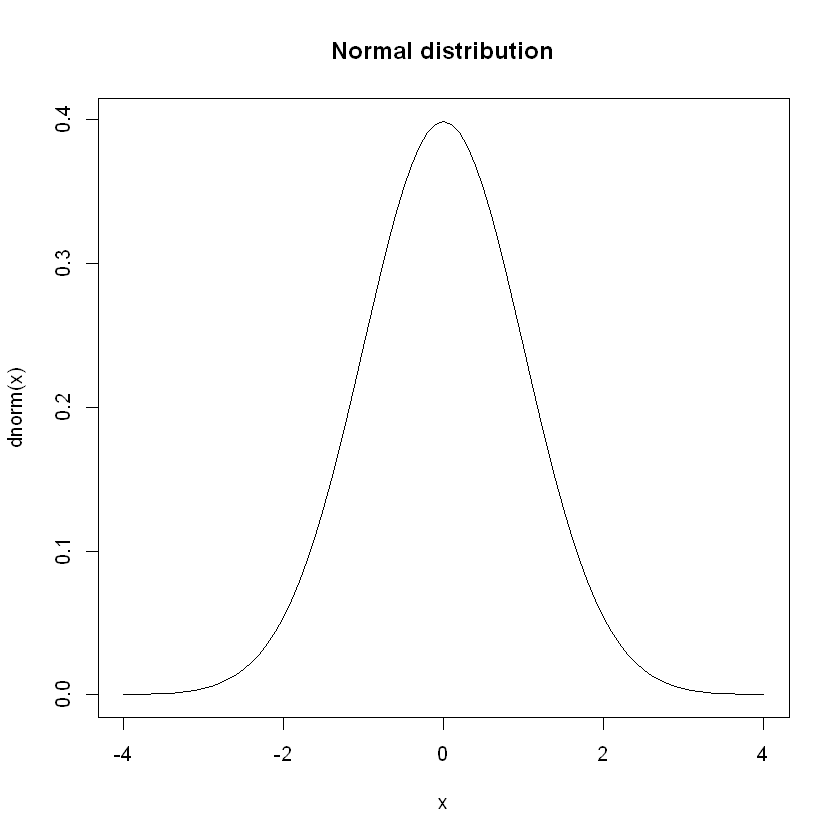

In [5]:
# Normal distribution

x <- seq(-4, 4, 0.1)
plot(x, dnorm(x), type='l')
title("Normal distribution")

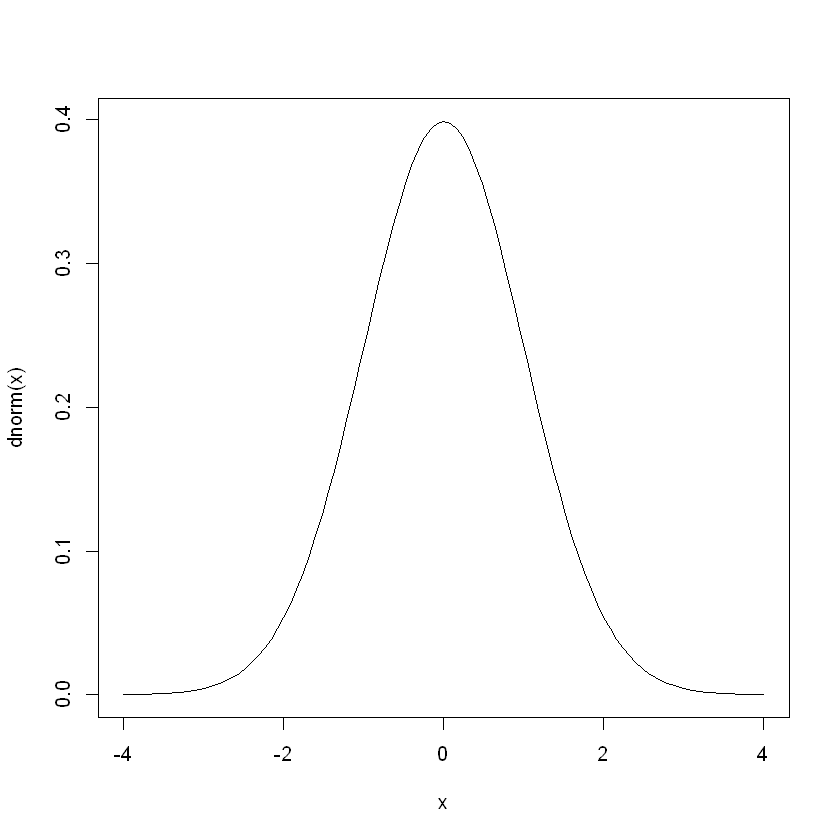

In [6]:
# 다른 방법
curve(dnorm(x), from=-4, to=4)

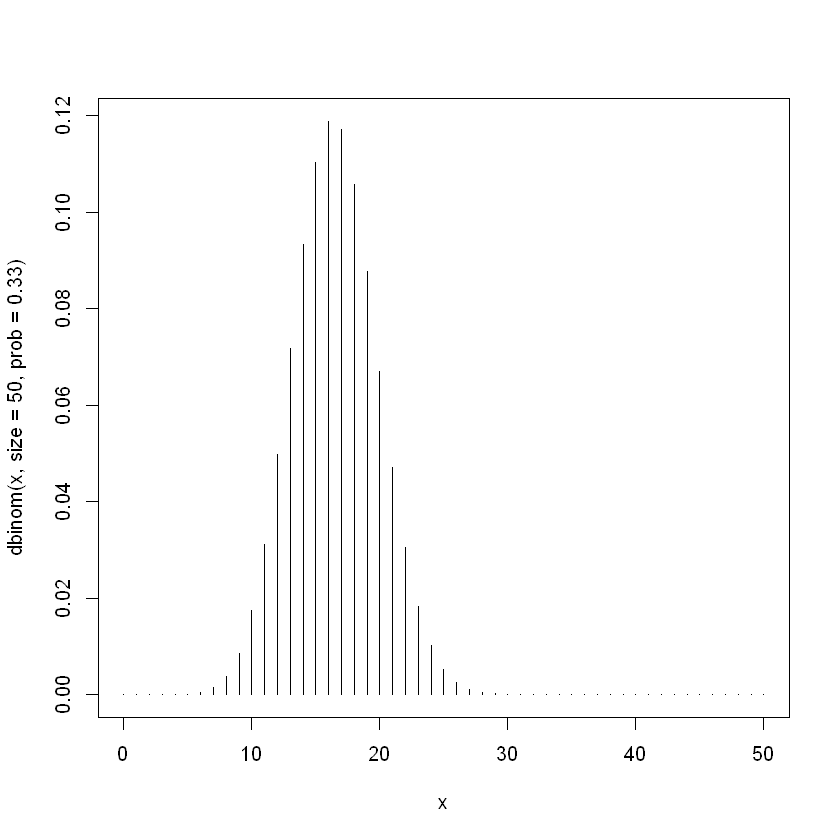

In [7]:
# Binomial distribution
x <- 0:50
plot(x, dbinom(x, size=50, prob=.33), type='h')

#### Cumulative distribution functions

- Normal distribution

<img src="https://latex.codecogs.com/svg.image?X\sim&space;N(132,13^2)"> <br>

Calcalate Pr(X ≥ 160)

In [8]:
1-pnorm(160, mean=132, sd=13)


[1] 0.01562612

- Binomial distribution

Twenty patients are given two treatments each and then asked whether treatment A or B worked better. It turned out that 16 patient liked A better. The question is the whether this can be taken as sufficient evidence that A actually is the better treatment or whether the outcome might as well have happened by chance even if the treatments were equally good.

X ~ b(20, 0.5)

<img src="https://latex.codecogs.com/svg.image?H_0:p=0.5"><br>
<img src="https://latex.codecogs.com/svg.image?H_1:p>0.5"><br>
<br>
<img src="https://latex.codecogs.com/svg.image?p-value=P(X\geq&space;16|H_0=1-P(X\leq&space;15)">



In [9]:
1-pbinom(15, size=20, prob=0.5)

[1] 0.005908966

#### Quantiles(백분위수)

- The quantile function is the inverse of the cumulative distribution function. The p-quantile is the value with the property that there is probability p of getting a value less than or equal to it. the median is by definition the 50% quantile.

- 95% CI for μ

<center>
<img src="https://latex.codecogs.com/svg.image?\bar{x}&plus;\sigma/\sqrt(n)\times&space;N_{0.025}\leq\mu\leq\bar{x}&plus;\sigma/\sqrt(n)\times&space;N_{0.975}">
</center>

where <img src="https://latex.codecogs.com/svg.image?N_{0.025}"> is the 2.5% quantile in the normal distribution.

In [13]:
xbar <- 83
sigma <- 12
n <- 5
sem <- sigma/sqrt(n)
sem
xbar + sem*qnorm(0.025)
xbar + sem*qnorm(0.975)

[1] 5.366563

[1] 72.48173

[1] 93.51827

#### Random numbers

In [14]:
rnorm(10)
rnorm(10, mean=7, sd=5)
rbinom(10, size=20, prob=0.5)

[1]  1.92628951  0.41577859 -0.42908953  0.07120468  0.03983438 -0.14577320
 [7] -1.96245745  1.14221532  0.37001300 -1.39949851

[1]  4.2672133 10.1538410  4.8360112 11.6548605  9.9273912 -0.8515582
 [7]  2.8740514 11.3290139  9.9594299 13.7533120

[1]  9  6 13 13 11 10 13 12 10 11

## 02 Descriptive Statistics and Graphics(기술통계와 그래프)

### 1. Summary statistics for a single group

#### Calculate the mean, standard deviation, variance, and median

In [18]:
x <- rnorm(50)
mean(x)
sd(x)
var(x)
median(x)
quantile(x)

pvec <- seq(0,1,0.1)
quantile(x, pvec)

[1] 0.2556013

[1] 0.9893085

[1] 0.9787313

[1] 0.3881357

0%        25%        50%        75%       100% 
-2.0285136 -0.3397948  0.3881357  0.7848201  3.3754605

0%        10%        20%        30%        40%        50%        60% 
-2.0285136 -0.9697697 -0.5188793 -0.1984765  0.2215682  0.3881357  0.5133443 
       70%        80%        90%       100% 
 0.7055209  0.8434693  1.3187114  3.3754605

- In case there are missing values in data (1)

In [23]:
library(ISwR)
data(juul)
head(juul)
attach(juul)
mean(igf1)
mean(igf1, na.rm=T)
sum(!is.na(igf1))
summary(igf1)

,age,menarche,sex,igf1,tanner,testvol
,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>
1,NA,NA,NA,90,NA,NA
2,NA,NA,NA,88,NA,NA
3,NA,NA,NA,164,NA,NA
4,NA,NA,NA,166,NA,NA
5,NA,NA,NA,131,NA,NA
6,0.17,NA,1,101,1,NA


The following objects are masked from juul (pos = 3):

    age, igf1, menarche, sex, tanner, testvol




[1] NA

[1] 340.168

[1] 1018

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   25.0   202.2   313.5   340.2   462.8   915.0     321 